In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [6]:
#Reading the application_data csv file
application_data= pd.read_csv('application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data understanding

In [7]:
# Checking the number of rows and columns in the dataframe
application_data.shape

(307511, 122)

In [8]:
# Checking information about the dataframe
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Checking the datatype of each column in the dataframe
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
# Check the summary for the numeric columns in the Dataframe
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

In [11]:
# Checking the Percentage of null values in each column
null_values=application_data.isnull().sum()/len(application_data)*100

In [12]:
null_values.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [13]:
# Removing columns with null value more than or equal to 50%
application_data=application_data.loc[:,application_data.isnull().mean()<=.5]

In [14]:
# Checking the number of rows and columns in the dataframe after Removing columns with null
application_data.shape

(307511, 81)

#### For columns which has less percentage(around 13% or so), checking what will be the best metric to impute missing values

In [15]:
# retriving the columns with null values
application_df=application_data.columns[application_data.isnull().any()].tolist()
application_data[application_df].isnull().sum()*100/len(application_data)


AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13

In [16]:
#  NAME_TYPE_SUITE

print(application_data.NAME_TYPE_SUITE.head())
print(application_data.NAME_TYPE_SUITE.describe())

# As it a categorical datatype Mode will be the best matric for imputation 

print(application_data.NAME_TYPE_SUITE.mode())
# Unaccompanied turns out to be the mode for NAME_TYPE_SUITE, therefore null values should be imputed with -> Unaccompanied

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
0    Unaccompanied
dtype: object


0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


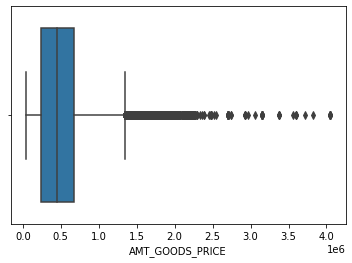

In [17]:
# AMT_GOODS_PRICE 

print(application_data.AMT_GOODS_PRICE.head())
print(application_data.AMT_GOODS_PRICE.describe())

# as we can see it's a numerical data, ploting box plot for identifying outliers
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [18]:
# We can clearly identify the presence of outliers in the data, therefore choosing Median as a metric for imputation

application_data.AMT_GOODS_PRICE.median()
# 450000.0 turns out to be the Median for AMT_GOODS_PRICE, therefore null values should be imputed with -> 450000.0

450000.0

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


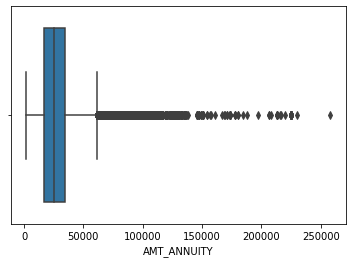

In [19]:
# AMT_ANNUITY 

print(application_data.AMT_ANNUITY.head())
print(application_data.AMT_ANNUITY.describe())

# There's a huge difference between min and max amount(Which is a clear indicator for the presence of outliers)
# Ploting box plot

sns.boxplot(application_data.AMT_ANNUITY)
plt.show()


In [20]:
# We can clearly identify the presence of outliers in the data, therefore choosing Median as a metric for imputation

application_data.AMT_ANNUITY.median()
# 24903.0 turns out to be the Median for AMT_ANNUITY, therefore null values should be imputed with -> 24903.0

24903.0

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


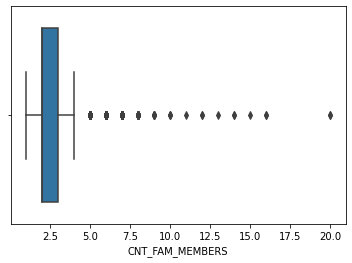

In [21]:
#For CNT_FAM_MEMBERS

print(application_data.CNT_FAM_MEMBERS.head())
print(application_data.CNT_FAM_MEMBERS.describe())

# as we can see it's a numerical data, ploting box plot for identifying outliers
sns.boxplot(application_data.CNT_FAM_MEMBERS)
plt.show()


In [22]:
# We can clearly identify the presence of outliers in the data, therefore choosing Median as a metric for imputation

application_data.CNT_FAM_MEMBERS.median()
# 2.0 turns out to be the Median for CNT_FAM_MEMBERS, therefore null values should be imputed with -> 2.0

2.0

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


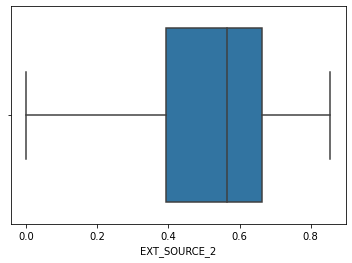

In [23]:
#EXT_SOURCE_2

print(application_data.EXT_SOURCE_2.head())
print(application_data.EXT_SOURCE_2.describe())

# Here there's not much difference between min and max values we can use both mean and median as a metric for imputaion 
# Ploting Box plot 

sns.boxplot(application_data.EXT_SOURCE_2)
plt.show()


In [24]:
# From boxplot it seems there is some tilt towards outliers therefore going with the Median.

application_data.EXT_SOURCE_2.median()
# 0.5659614260608526 turns out to be the Median for EXT_SOURCE_2, therefore null values should be imputed with -> 0.5659614260608526

0.5659614260608526

In [25]:
# Removing all the columns that are not relevant for our Analysis

application_data.drop(application_data.columns[application_data.columns.str.contains('FLAG_DOCUMENT')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('FLAG')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('FLOORSMAX')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('CNT_SOCIAL_CIRCLE')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('REGION_RATING_CLIENT')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('_WORK_CITY')], axis=1, inplace=True)
application_data.drop(application_data.columns[application_data.columns.str.contains('YEARS_BEGINEXPLUATATION_')], axis=1, inplace=True)
application_data.drop('DAYS_LAST_PHONE_CHANGE',axis=1,inplace=True)
delete_col=['TOTALAREA_MODE','EMERGENCYSTATE_MODE','REGION_POPULATION_RELATIVE','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','HOUR_APPR_PROCESS_START']
application_data.drop(labels= delete_col, axis=1, inplace=True)




In [26]:
# Checking the datatype of all Columns 
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   NAME_TYPE_SUITE             306219 non-null  object 
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

In [27]:
# Finding count of unique values in each column
application_data.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
WEEKDAY_APPR_PROCESS_START         7
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
ORGANIZATION_TYPE                 58
EXT_SOURCE_3                     814
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
DAYS_ID_PUBLISH                 6168
DAYS_EMPLOYED                  12574
AMT_ANNUITY                    13672
DAYS_REGISTRATION              15688
D

In [28]:
# Converting numerical columns into categorical
for x in application_data.columns:
    if application_data[x].nunique() <= 3: # here we are assuming that columns with 3 unique values are categorical 
        application_data[x] = application_data[x].astype(object)

application_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   NAME_TYPE_SUITE             306219 non-null  object 
 10  NAME_INCOME_TYPE            307511 non-null  object 
 11  NAME_EDUCATION_TYPE         307511 non-null  object 
 12  NAME_FAMILY_STATUS          307511 non-null  object 
 13  NAME_HOUSING_T

#### After converting manually checked columns with unique value count greater than 3 to see if any int/float column is worngly read as object, but no such column is found

In [29]:
# Converting negative DAYS_BIRTH value to positive value

application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()

# Converting negative DAYS_EMPLOYED value to positive value

application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].abs()

# Converting negative DAYS_REGISTRATION value to positive value

application_data['DAYS_REGISTRATION']=application_data['DAYS_REGISTRATION'].abs()

# Converting negative DAYS_ID_PUBLISH value to positive value

application_data['DAYS_ID_PUBLISH']=application_data['DAYS_ID_PUBLISH'].abs()


#### Checking for outliers in numerical columns and adding observations & reasoning

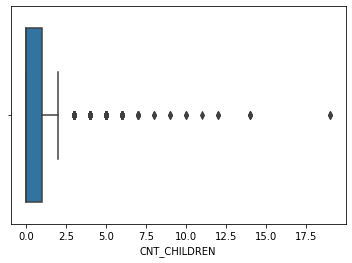

The values greater than 2.5 are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier.


In [30]:
# Checking for outliers using Interquartile Range(IQR)

# CNT_CHILDREN

sns.boxplot(application_data.CNT_CHILDREN)
plt.show()

# From the Boxplot we can clearly see that presence of outliers i.e. values above the upper whisker in our case 

Q1 = application_data['CNT_CHILDREN'].quantile(0.25)
Q3 = application_data['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier.".format(upperwhisker))

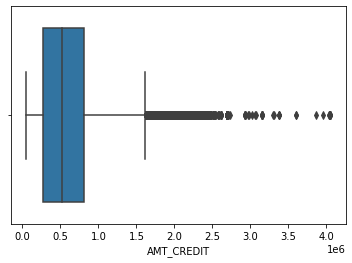

The values greater than 1616625.0 are considered to be outliers.


In [31]:
# AMT_CREDIT

sns.boxplot(application_data.AMT_CREDIT)
plt.show()

# From the Boxplot we can clearly see that presence of outliers i.e. values above the upper whisker in our case 

Q1 = application_data['AMT_CREDIT'].quantile(0.25)
Q3 = application_data['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers.".format(upperwhisker))


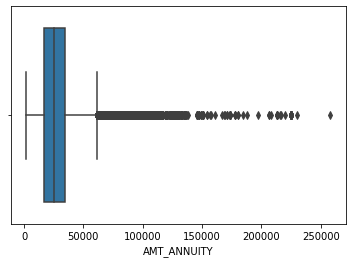

The values greater than 61704.0 are considered to be outliers.


In [32]:
# AMT_ANNUITY

sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

# From the Boxplot we can clearly see that presence of outliers i.e. values above the upper whisker in our case 

Q1 = application_data['AMT_ANNUITY'].quantile(0.25)
Q3 = application_data['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers.".format(upperwhisker))



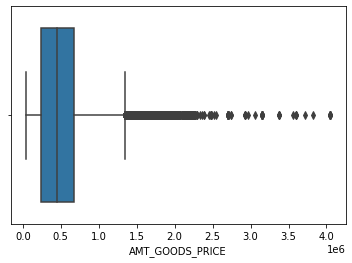

The values greater than 1341000.0 are considered to be outliers.


In [33]:
# AMT_GOODS_PRICE

sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

# From the Boxplot we can clearly see that presence of outliers i.e. values above the upper whisker in our case 

Q1 = application_data['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_data['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers.".format(upperwhisker))


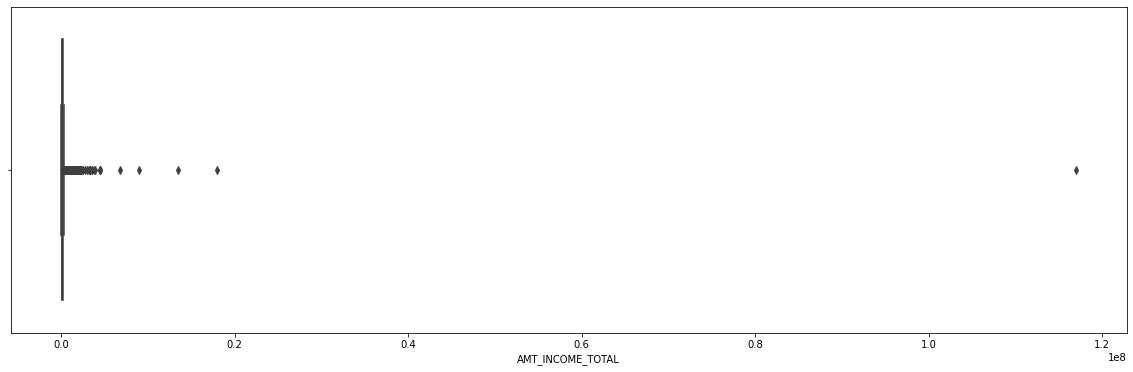

The values greater than 337500.0 are considered to be outliers.


In [34]:
# AMT_INCOME_TOTAL    

plt.figure(figsize=(20,6))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

# From the Boxplot we can clearly see the presence of outliers i.e. values above the upper whisker in our case.

Q1 = application_data['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application_data['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers.".format(upperwhisker))


In [35]:
# Binning the Continous variables

# AMT_INCOME_TOTAL

application_data['AMT_INCOME_RANGE']= pd.qcut(application_data.AMT_INCOME_TOTAL, [0,0.2,0.5,0.8,0.95,1],['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_data.AMT_INCOME_RANGE.head(10)


0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [36]:
# AMT_CREDIT

application_data['AMT_CREDIT_RANGE']= pd.qcut(application_data.AMT_CREDIT, [0,0.2,0.5,0.8,0.95,1],['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
application_data.AMT_CREDIT_RANGE.head(10)


0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [37]:
# Converting 'DAYS_BIRTH' to years

application_data['YEAR_BIRTH']= (application_data['DAYS_BIRTH']/365).astype(int)

In [38]:
# Removing DAYS_BIRTH Column

application_data.drop('DAYS_BIRTH',axis=1,inplace=True)

In [39]:
# Checking unique values of the column

application_data['YEAR_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [40]:
# Binning 'DAYS_BIRTH'

application_data['DAYS_BIRTH_RANGE']=pd.cut(application_data['YEAR_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
application_data.DAYS_BIRTH_RANGE.value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_RANGE, dtype: int64

## Analysis

In [41]:
#Loading the application dataset 

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,YEAR_BIRTH,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637,3648.0,2120,Laborers,1.0,WEDNESDAY,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,MEDIUM,LOW,25,Very_Young
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188,1186.0,291,Core staff,2.0,MONDAY,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,45,Middle_Age
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,225,4260.0,2531,Laborers,1.0,MONDAY,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,VERY_LOW,VERY_LOW,52,Middle_Age
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW,LOW,52,Middle_Age
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,3038,4311.0,3458,Core staff,1.0,THURSDAY,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,LOW,LOW,54,Middle_Age


0    91.927118
1     8.072882
Name: TARGET, dtype: float64


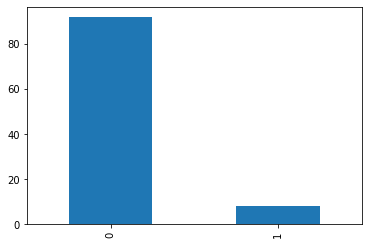

In [42]:
#Checking the imbalance percentage

target_imbal=application_data['TARGET'].value_counts(normalize = True)*100
print(target_imbal)

# Ploting vertical bar plot  
target_imbal.plot.bar()
plt.show()

# There are 91.927118% of non defaulters and 8.072882% of defaulters in our dataset 

#### Therefore this is not a balanced dataset 

In [43]:
# Dividing the data into two sets, i.e. Target=1 and Target=0.

application_data_1=application_data[application_data.TARGET==1]
application_data_0=application_data[application_data.TARGET==0]

## Univariate Analysis

#### Univariate Analysis for Categorical Variables

In [44]:
# Function to plot for Categorical Variables

def plotfunction(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=application_data_0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=application_data_1)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

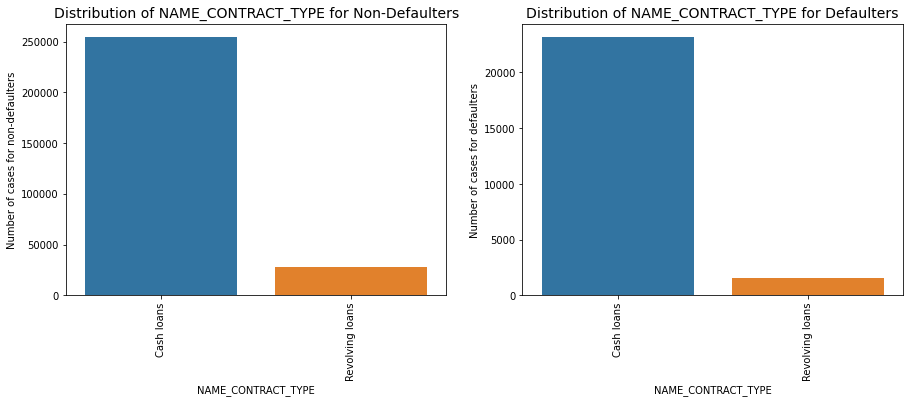

In [45]:
# NAME_CONTRACT_TYPE

plotfunction('NAME_CONTRACT_TYPE')

Definition :- A revolving loan provides a borrower with a maximum aggregate amount of capital, available over a specified period of time. Unlike a term loan, the revolving loan allows the borrower to draw down, repay and re-draw loans on the available funds during the term of the note.

We can notice that the Revolving loans are lesser in the defaulted population. Therefore we can infer that revolving loans are comparatively safer. This can be due to the nature of revolving loan as they are flexible financing tool .

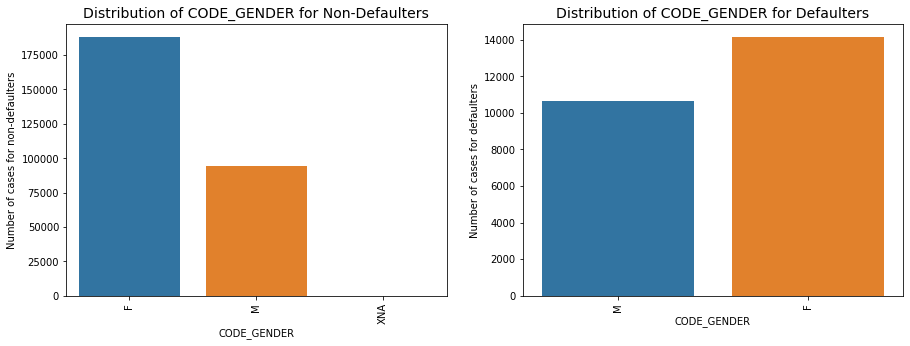

In [46]:
# CODE_GENDER

plotfunction('CODE_GENDER')

- Females tend to take more loan than Males in general
- Number of female defaulters are higher than Males  

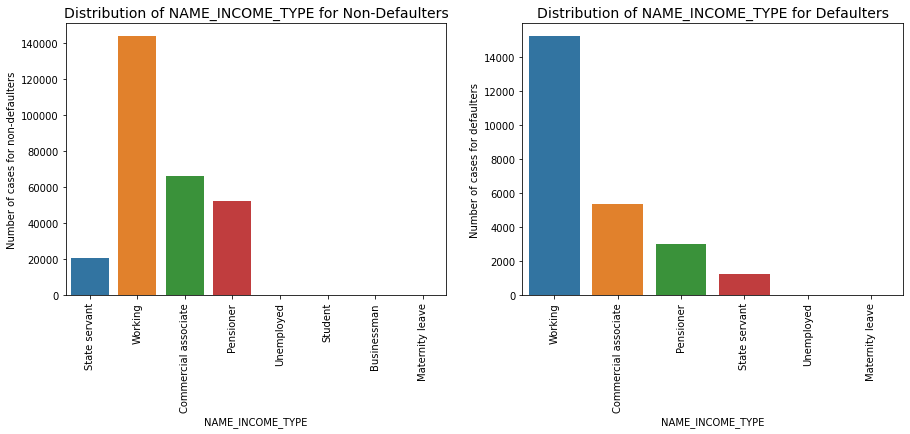

In [47]:
# NAME_INCOME_TYPE

plotfunction('NAME_INCOME_TYPE')

From the graph above we can infer that 
 - Majority of defaulters income type is working and at the same time they are good income to bank as well
 - Pensioner of not default case are high in number compared to Pensioner of default case.

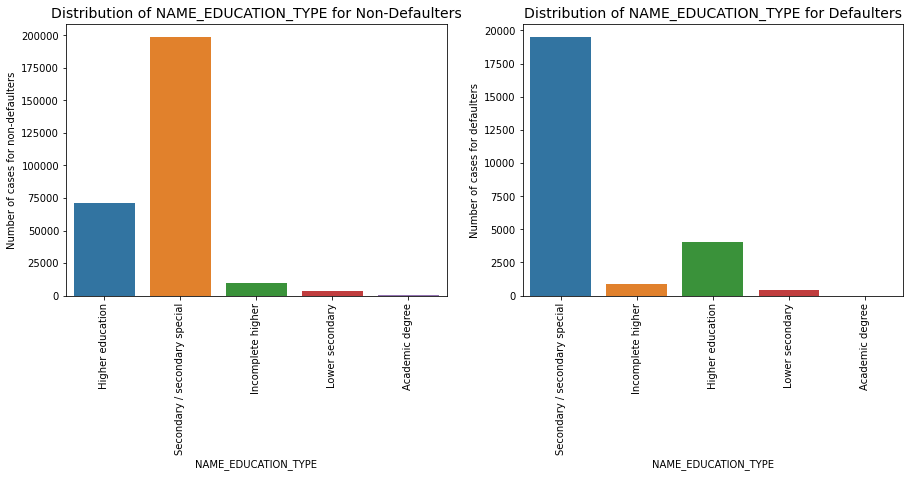

In [48]:
# NAME_EDUCATION_TYPE

plotfunction('NAME_EDUCATION_TYPE')

- From the graph above, we can say that secondary/special educated people are applying loans high in number.
- Higher education count is lesser in defualted population as compared to non defaulted population.
- People holding Academic degree have applied for loan the least number of times.

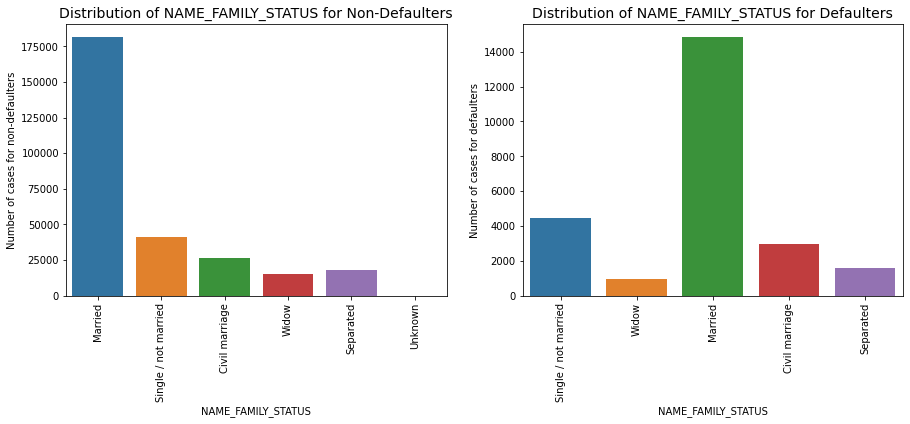

In [49]:
# NAME_FAMILY_STATUS

plotfunction('NAME_FAMILY_STATUS')

- Married people tend to take more loans than other category 
- Single/ not married is proportionally higher in defaulted population as compared to non defaulted population. This shows that   Single applicants have higher defaults.

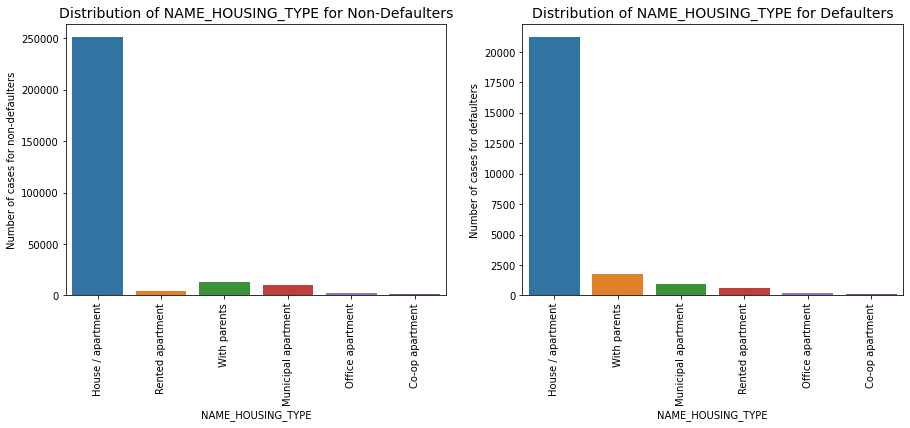

In [50]:
# NAME_HOUSING_TYPE

plotfunction('NAME_HOUSING_TYPE')

- From the above graph we can notice that 
  - Population living in Rented apartments and with parents have higher default rate as their proportion in defaulted population is higher than non-defaulted population.
  - Population living in House/apartment tend to take more loans than any other category.

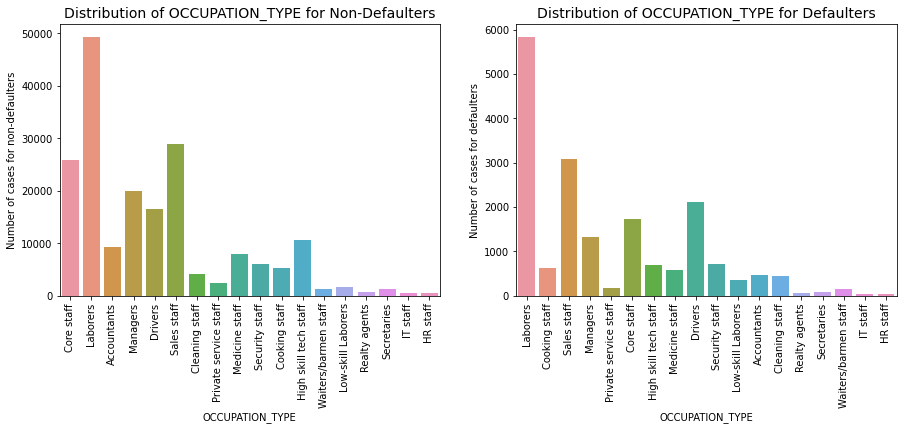

In [51]:
# OCCUPATION_TYPE

plotfunction('OCCUPATION_TYPE')

- Population with Occupation type as 'Laborers' have the highest number of loan count
- Popualtion with Occupation type as 'Core staff' have significantly high proportion of non-defaulters when compared to defaulters. 
- Population with "HR staff" as Occupation type has lowest loan count.

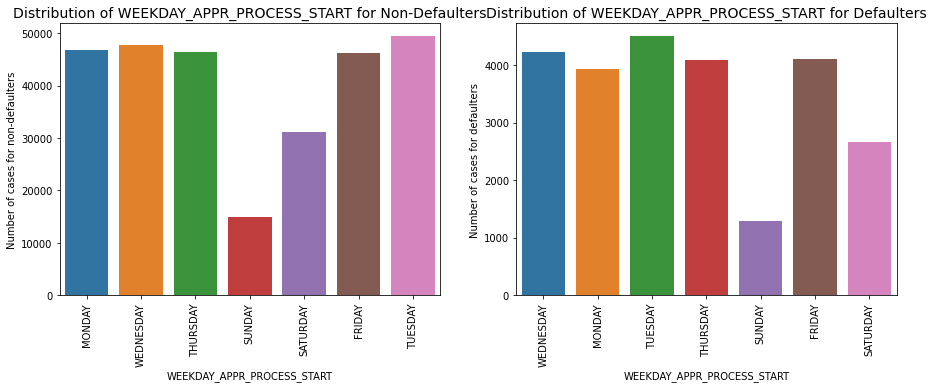

In [52]:
# WEEKDAY_APPR_PROCESS_START

plotfunction('WEEKDAY_APPR_PROCESS_START')

From the above graph we can infer that
- Application starting processes are generally less in saturday and sunday.
- On the other hand it is the highest on Tuesdays.

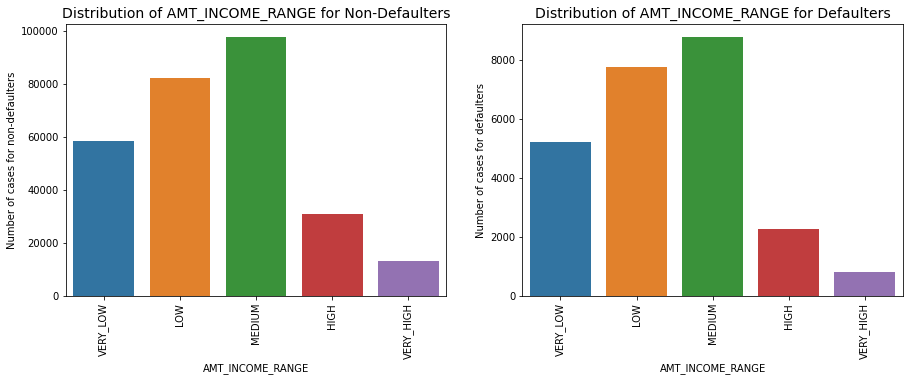

In [53]:
# AMT_INCOME_RANGE

plotfunction('AMT_INCOME_RANGE')

In [54]:
# Calculating percentage for Non_defaulters and defaulters with respect to AMT_INCOME_RANGE

Non_defaulters=application_data_0.AMT_INCOME_RANGE.value_counts(normalize=True)
defaulters=application_data_1.AMT_INCOME_RANGE.value_counts(normalize=True)
print(Non_defaulters)
print(defaulters)

MEDIUM       0.346179
LOW          0.291256
VERY_LOW     0.206752
HIGH         0.109050
VERY_HIGH    0.046762
Name: AMT_INCOME_RANGE, dtype: float64
MEDIUM       0.353394
LOW          0.312387
VERY_LOW     0.210473
HIGH         0.090876
VERY_HIGH    0.032870
Name: AMT_INCOME_RANGE, dtype: float64


- Population with Medium income range has the highest count of loan. 
- Population with low and very low income range has higher defaults as their proportion in defaulted population is higher than in the non defaulted population.
- Population with very high income range has the lowest loan count 

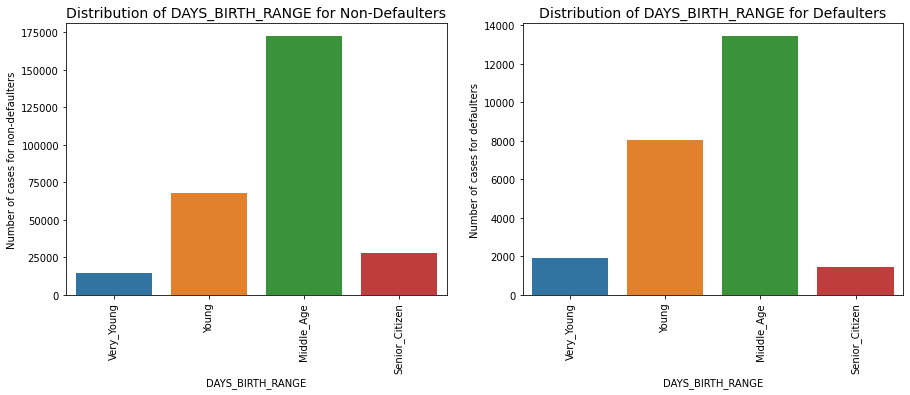

In [55]:
# DAYS_BIRTH_RANGE
 
plotfunction('DAYS_BIRTH_RANGE')

From the above graph we can infer that 
 - Middle age Population tend to more loans than any other category 
 - Young age Population have significantly higher proportion of defaulters when compaired to non-defaulters.  

#### Univariate Analysis for Numerical Variables

In [56]:
def plotbar(x):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    application_data_0[x].plot.hist()
    plt.title('Non-Defaulters', fontsize=14)
    plt.xlabel(x)
    
    plt.subplot(1, 2, 2)
    application_data_1[x].plot.hist()
    plt.title('Defaulters', fontsize=14)
    plt.xlabel(x)
   
    plt.show()

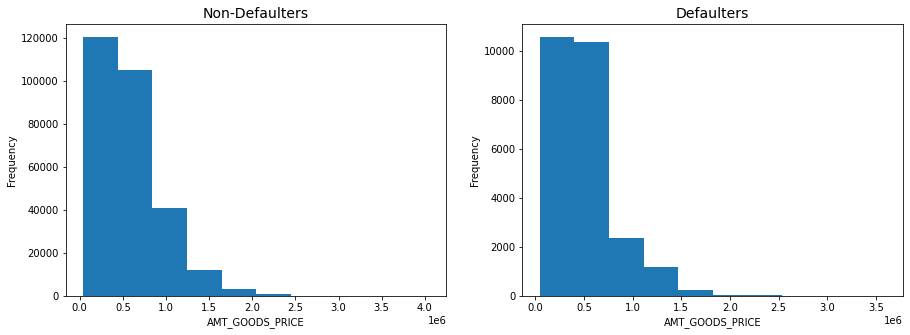

In [57]:
# AMT_GOODS_PRICE

plotbar('AMT_GOODS_PRICE')

- There's high frequency for loans whose price of the goods for which the loan given is low 
- Defaults are higher for price of the goods for which the loan given is lesser (between 0 to 7,00,000)

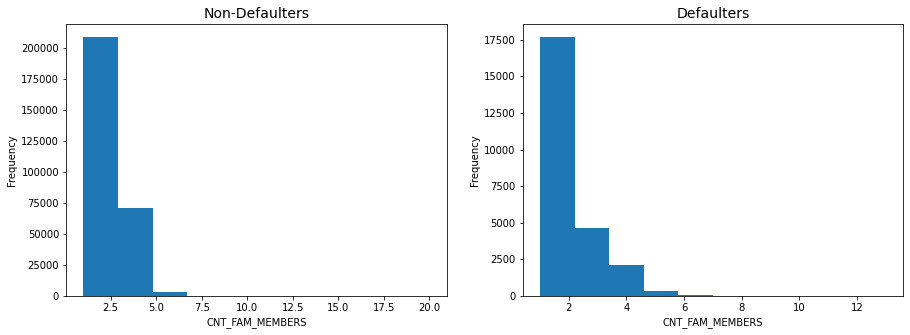

In [58]:
# CNT_FAM_MEMBERS

plotbar('CNT_FAM_MEMBERS')

- Population having family members less than or equal to 3 have high frequency of loan 
- Population having family members less than or equal to 2 have high default rate 

## Bivariate Analysis

####  Bivariate Analysis for Categorical vs Numerical Variables

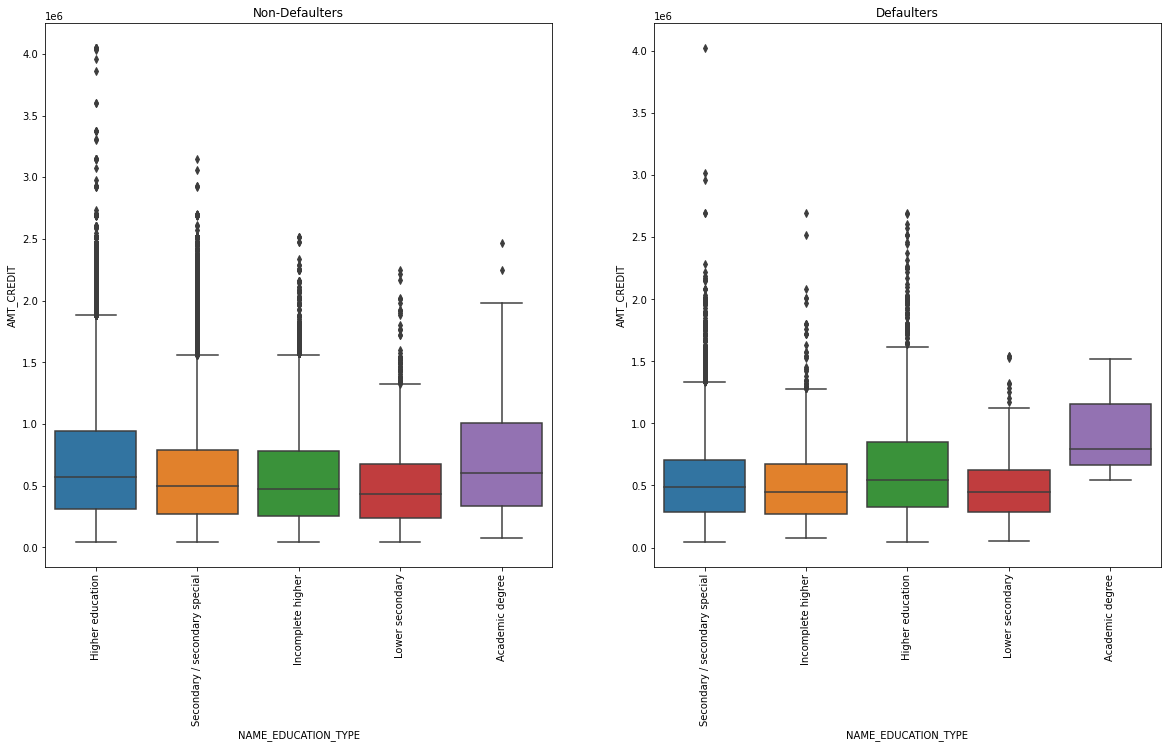

In [59]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.boxplot(x  = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = application_data_1)
plt.xticks(rotation=90)

plt.show()

- Default Population with Academic degree tend to take high amount of loans only as the min value of Academic degree is greater than median of all other categories 
- And we can also notice high variation for non-default Population with Academic degree as the min and max value are far away from each other 
- Higher education population tend to take highest amount of loans
- There's presence of outliers in almost all categories except Default Population with Academic degree

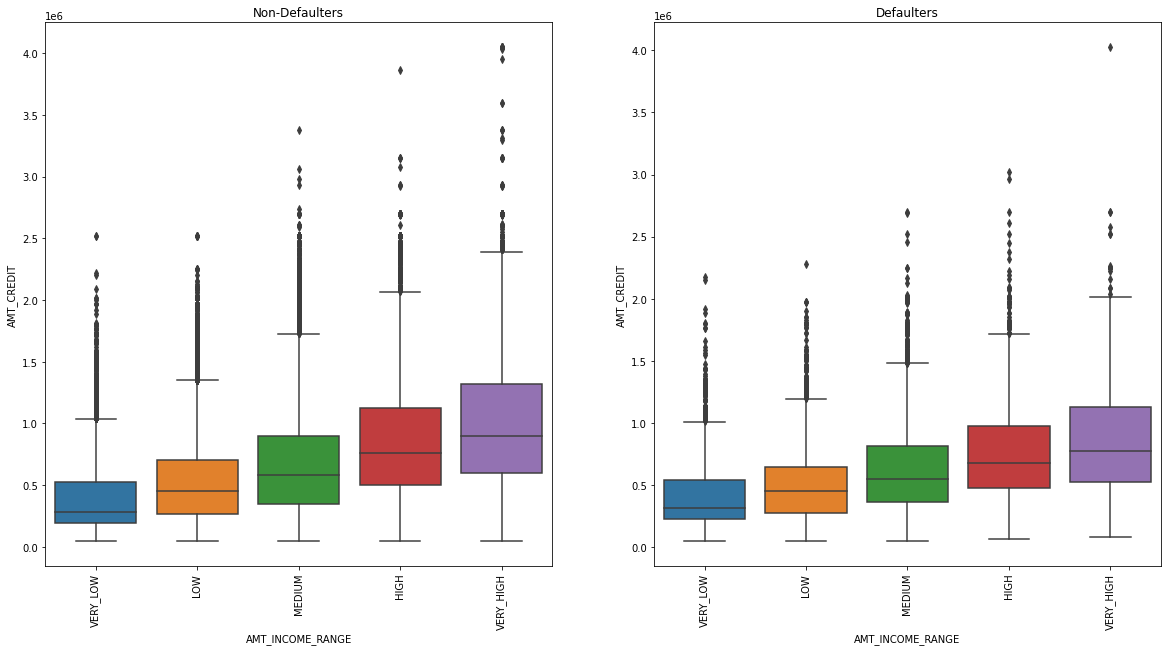

In [60]:
# AMT_INCOME_RANGE vs AMT_CREDIT

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.boxplot(x = 'AMT_INCOME_RANGE', y = 'AMT_CREDIT', data = application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.boxplot(x  = 'AMT_INCOME_RANGE', y = 'AMT_CREDIT', data = application_data_1)
plt.xticks(rotation=90)

plt.show()

- We can notice a pattern here as the AMT_INCOME_RANGE increases the variation between min and max also increases
- Population with VERY_HIGH Income range tend to take high amount of loans

#### Bivariate Analysis of Categorical-Categorical

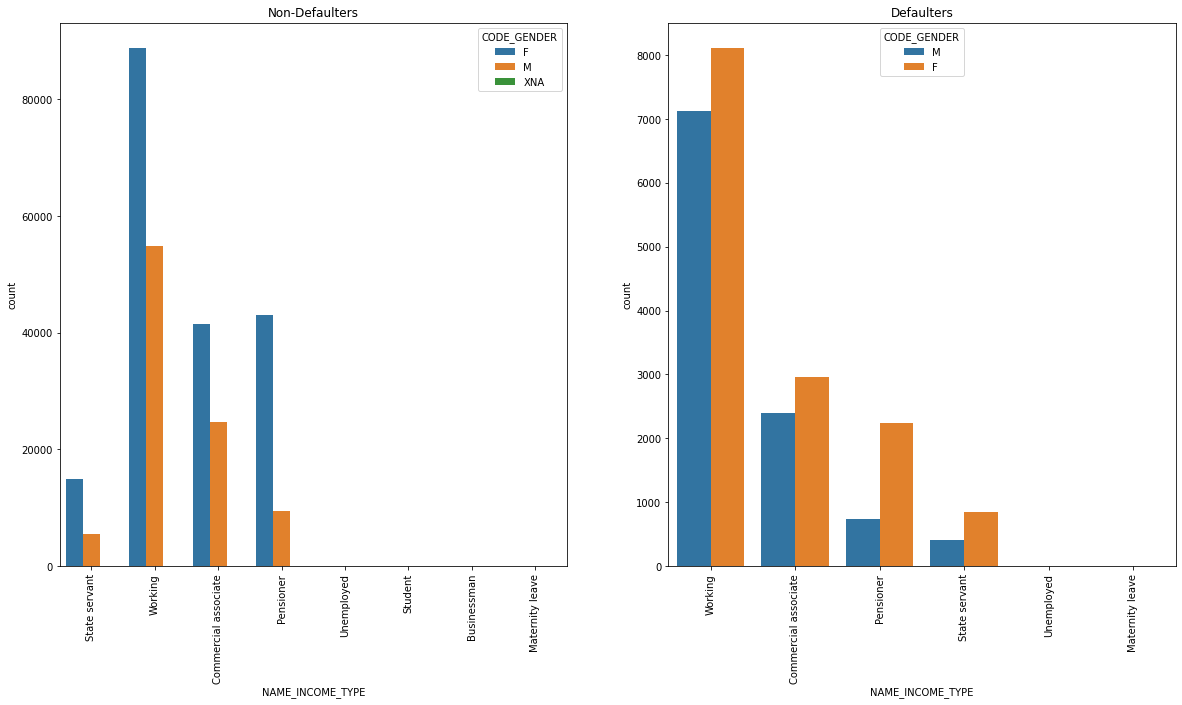

In [61]:
# NAME_INCOME_TYPE VS CODE_GENDER

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.countplot('NAME_INCOME_TYPE', hue = 'CODE_GENDER', data =application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.countplot('NAME_INCOME_TYPE', hue = 'CODE_GENDER', data =application_data_1)
plt.xticks(rotation=90)

plt.show()

- From the above graph we can infer that Females tend to take more loan than Males
- Working Females has the highest number of non-default population and on the other hand they are the top defaulters as well when compared to all the other categories. 
- proportion of working Males in default population is significantly higher than non-default population.

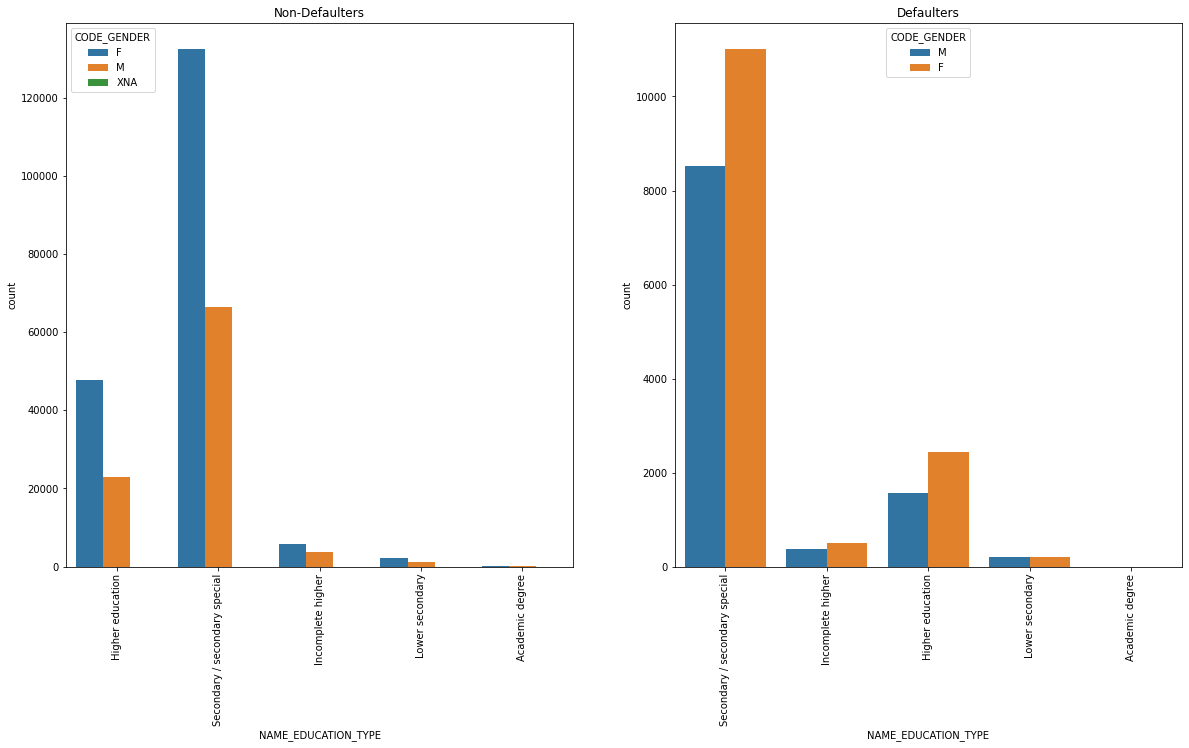

In [62]:
# NAME_EDUCATION_TYPE VS CODE_GENDER

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data =application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data =application_data_1)
plt.xticks(rotation=90)

plt.show()

- Both Males and Females with secondary/secondary special education type tend to take more loan than any other category.
- Population with Academic degree has lowest count of loan 

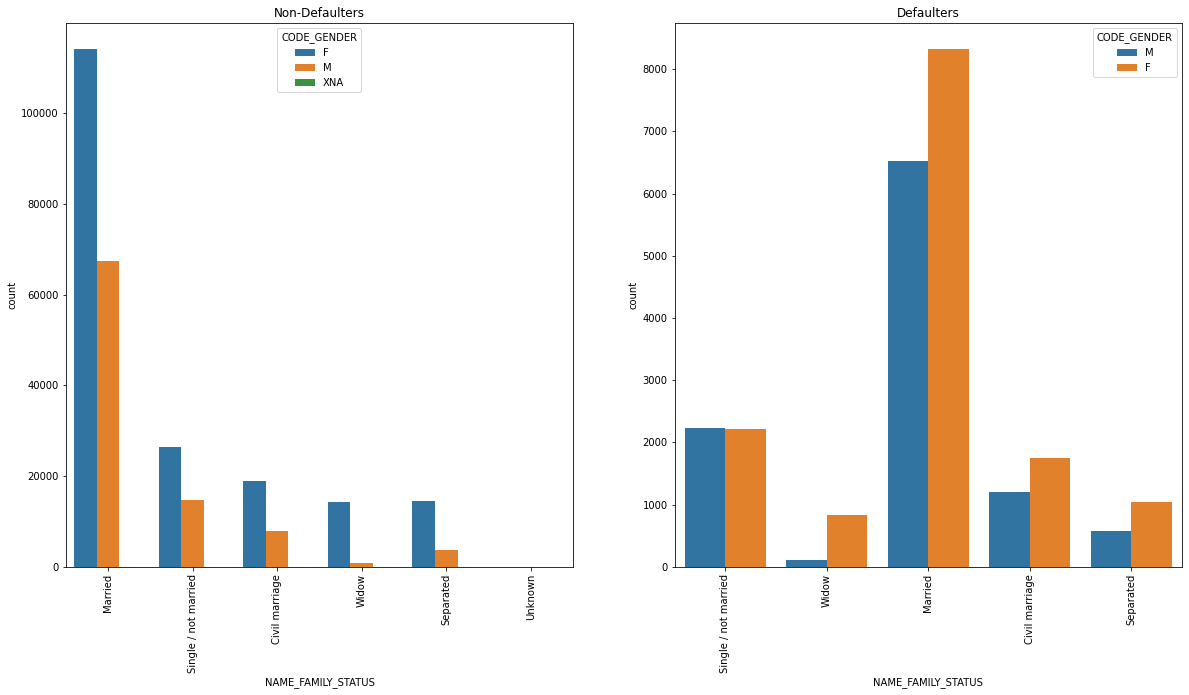

In [63]:
# NAME_FAMILY_STATUS VS CODE_GENDER

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data =application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data =application_data_1)
plt.xticks(rotation=90)

plt.show()

- From the above graph we can infer that married population tend to take more loan than than any other category 
- Married females have the highest count of loan default  

#### Bivariate Analysis of Numerical vs Numerical Variables

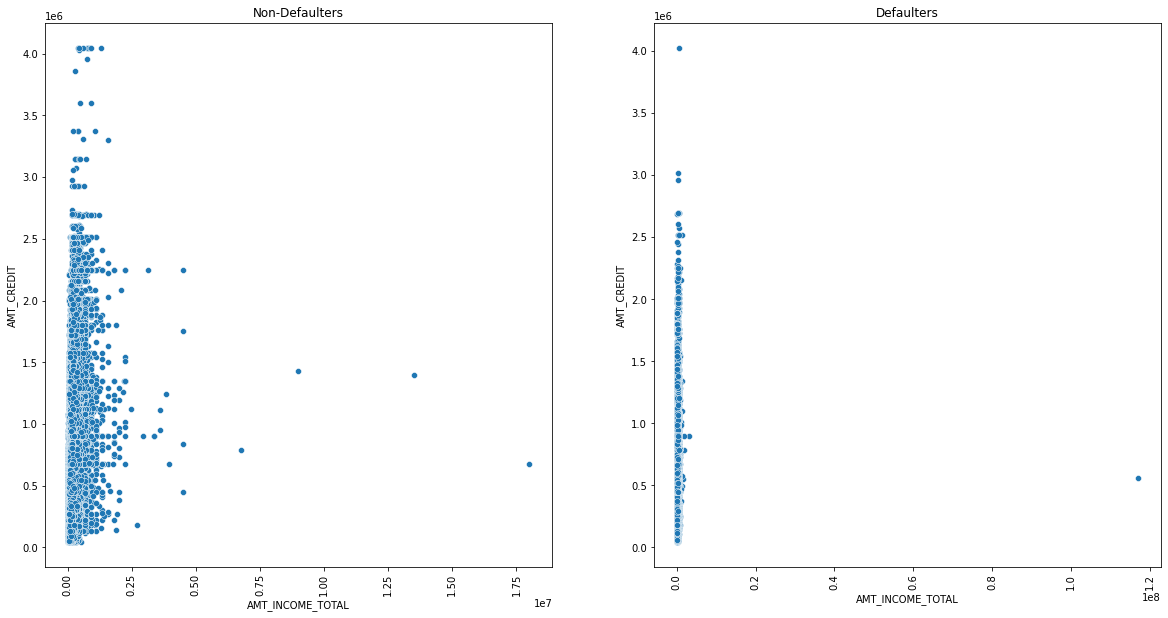

In [64]:
# AMT_INCOME_TOTAL vs AMT_CREDIT

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.scatterplot(x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', data =application_data_0)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.scatterplot(x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', data =application_data_1)
plt.xticks(rotation=90)

plt.show()

- from the above scatterplot we can infer that population with low Income are tend to default


## Finding correlation for numerical column for both cases of target column

In [65]:
# Finding Top 10 Correlated values for case of Default i.e. 1

corr_1=application_data_1.corr()
corrdf=corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
98,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
172,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
79,AMT_ANNUITY,AMT_CREDIT,0.752195
348,YEAR_BIRTH,DAYS_EMPLOYED,0.582441
349,YEAR_BIRTH,DAYS_REGISTRATION,0.289116
343,YEAR_BIRTH,CNT_CHILDREN,0.259222
350,YEAR_BIRTH,DAYS_ID_PUBLISH,0.252256
259,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.246741
158,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090


When defaulted, major portion of decision is taken by-
  - AMT_GOODS_PRICE and AMT_CREDIT
  - CNT_FAM_MEMBERS	and CNT_CHILDREN	
  - AMT_GOODS_PRICE and AMT_ANNUITY

In [66]:
# Finding Top 10 Correlated values for case of Non-Default i.e. 0

corr_0=application_data_0.corr()
corrdf=corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Coorelation']
corrdf.dropna(subset=['Coorelation'],inplace=True)
corrdf['Coorelation']=abs(corrdf['Coorelation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Coorelation',ascending=False).head(10)

,Var1,Var2,Coorelation
98,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
172,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
99,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
79,AMT_ANNUITY,AMT_CREDIT,0.771309
348,YEAR_BIRTH,DAYS_EMPLOYED,0.626028
78,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
97,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
59,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
343,YEAR_BIRTH,CNT_CHILDREN,0.336907
349,YEAR_BIRTH,DAYS_REGISTRATION,0.333025


When not defaulted, major portion of decision is taken by-
  - AMT_GOODS_PRICE and AMT_CREDIT
  - CNT_FAM_MEMBERS	and CNT_CHILDREN	
  - AMT_GOODS_PRICE and AMT_ANNUITY

# PREVIOUS APPLICATION 

In [67]:
#Reading the previous_application csv file

previous_data= pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [68]:
# Checking the number of rows and columns in the dataframe

previous_data.shape

(1670214, 37)

In [69]:
# Checking information about the dataframe

previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
# Checking the datatype of each column in the dataframe

previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [71]:
# Checking the summary for the numeric columns in the Dataframe

previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Cleaning

In [72]:
# Checking the Percentage of null values in each column

null_values = previous_data.isnull().sum()/len(previous_data)*100
null_values

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [73]:
null_values.sort_values(ascending = False).head(40)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [74]:
# Removing columns with null value more than or equal to 40%

previous_data=previous_data.loc[:,previous_data.isnull().mean()<=.4]

In [75]:
# Checking the number of rows and columns in the dataframe after Removing columns with null

previous_data.shape

(1670214, 26)

## Univariate Analysis

In [76]:
# function to count plot for categorical variables

def plot_univariate(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=previous_data,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

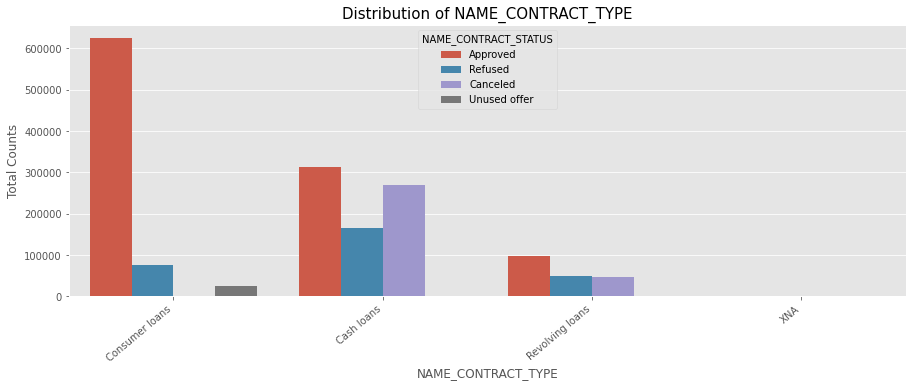

In [77]:
plot_univariate('NAME_CONTRACT_TYPE')

- From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. 
- Although the cash loans are refused more often than others.

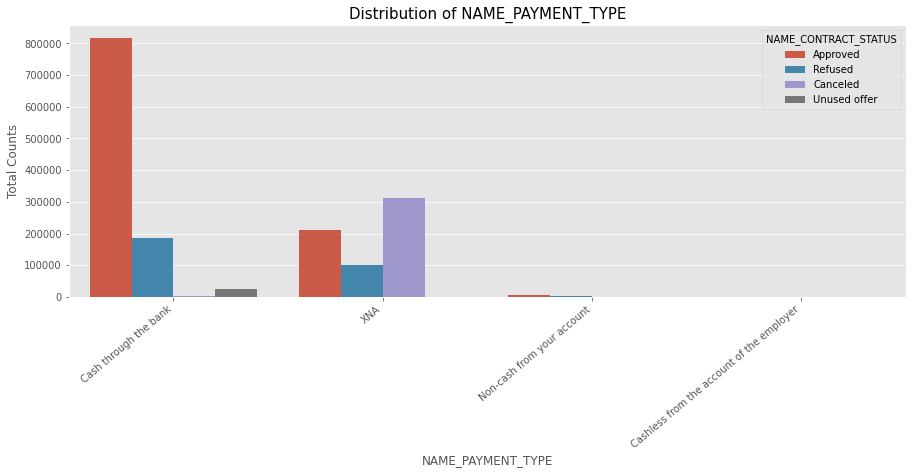

In [78]:
plot_univariate('NAME_PAYMENT_TYPE')

- From the above chart, we can infer that most of the clients chose to repay the loan using the'Cash through the bank' option.
- We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all   popular in terms of loan repayment amongst the customers.

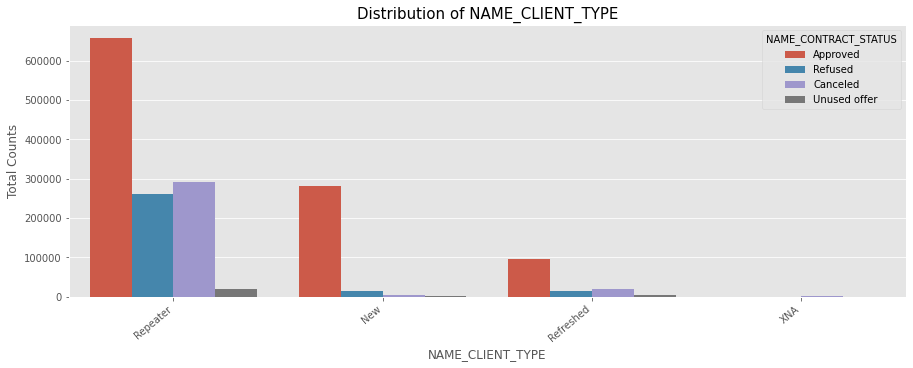

In [79]:
plot_univariate('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

#### Checking the correlation in the Previous Application dataset

In [80]:
#Getting the top 10 correlation Previous Application dataset

corr=previous_data.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
59,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
47,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
46,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
35,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
113,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
114,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129,0.672129
112,CNT_PAYMENT,AMT_ANNUITY,0.394535,0.394535


#### Using pairplot to perform bivariate analysis on numerical columns

<Figure size 1440x576 with 0 Axes>

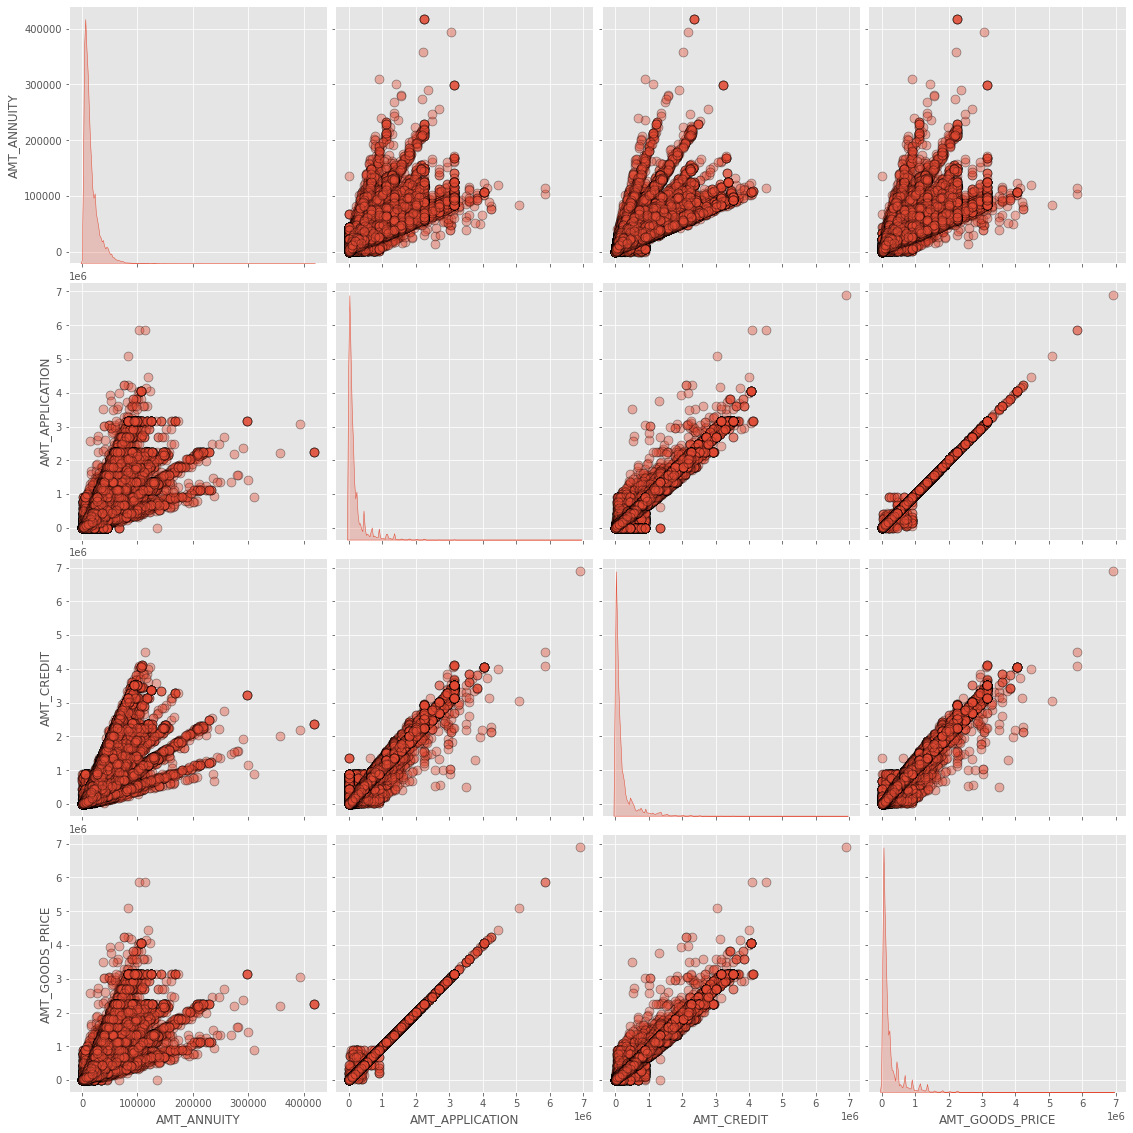

In [81]:
#plotting the relation between correlated highly corelated numeric vriables

plt.figure(figsize=[20,8])
sns.pairplot(previous_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

1. Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors):-

   - How much credit did client asked on the previous application  
   - Final credit amount on the previous application that was approved by the bank 
   - Goods price of good that client asked for on the previous application.
   

2. For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

3. Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

### Bivariate Analysis

In [82]:
#bivariate analysis function to plot graph

def plot_by_cateogical_numeric(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=previous_data)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

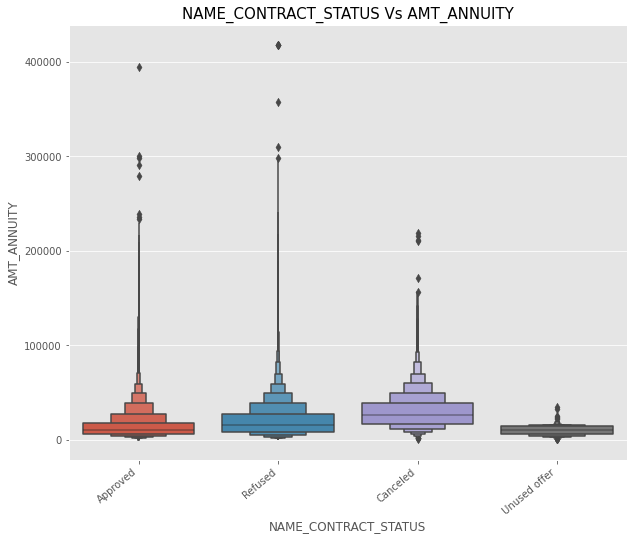

In [83]:
#bivarient analysis of Contract status and Annuity of previous appliction

plot_by_cateogical_numeric('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time. We also see that applications with too high AMT ANNUITY also got refused more often than others.

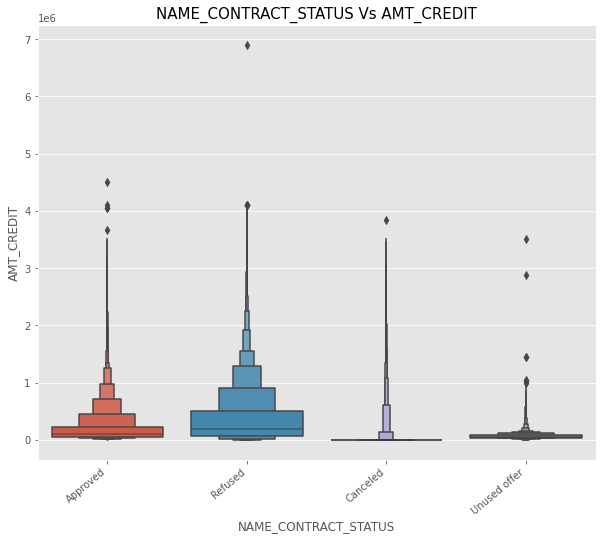

In [84]:
#bivarient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval

plot_by_cateogical_numeric('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

## Top Major variables to consider for loan prediction:
 - NAME_EDUCATION_TYPE
 - AMT_INCOME_TOTAL
 - DAYS_BIRTH
 - AMT_CREDIT
 - NAME_INCOME_TYPE
 - CODE_GENDER
 - NAME_HOUSING_TYPE
 - AMOUNT_GOODS_PRICE
 - OCCUPATION_TYPE
 - CODE_GENDER

The above mentioned variables are to be considered before approving application to minimize risk of loss.

#### By Arun Tyagi & Hitik Negi